In [14]:
import csv
import json
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import requests


url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"market":"CNY","symbol":"BTC","function":"DIGITAL_CURRENCY_DAILY"}

headers = {
    'x-rapidapi-host': "alpha-vantage.p.rapidapi.com",
    'x-rapidapi-key': "d546c636d9msh6d57bb52757acb4p161de7jsn03d3c950f164"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

res = json.loads(response.text)
data = pd.DataFrame(res)



In [15]:
data.head(10)

,Meta Data,Time Series (Digital Currency Daily)
1. Information,Daily Prices and Volumes for Digital Currency,NaN
2. Digital Currency Code,BTC,NaN
3. Digital Currency Name,Bitcoin,NaN
4. Market Code,CNY,NaN
5. Market Name,Chinese Yuan,NaN
6. Last Refreshed,2020-09-11 00:00:00,NaN
7. Time Zone,UTC,NaN
2020-09-11,NaN,"{'1a. open (CNY)': '70648.30335600', '1b. open..."
2020-09-10,NaN,"{'1a. open (CNY)': '69844.75943400', '1b. open..."
2020-09-09,NaN,"{'1a. open (CNY)': '69211.67043600', '1b. open..."


In [16]:
last_refreshed = data.loc['6. Last Refreshed']['Meta Data']
Time_zone = data.loc['7. Time Zone']['Meta Data']

In [17]:
data.dropna(axis='index', how='all', subset=['Time Series (Digital Currency Daily)'], inplace=True)
data

,Meta Data,Time Series (Digital Currency Daily)
2020-09-11,NaN,"{'1a. open (CNY)': '70648.30335600', '1b. open..."
2020-09-10,NaN,"{'1a. open (CNY)': '69844.75943400', '1b. open..."
2020-09-09,NaN,"{'1a. open (CNY)': '69211.67043600', '1b. open..."
2020-09-08,NaN,"{'1a. open (CNY)': '70898.38137000', '1b. open..."
2020-09-07,NaN,"{'1a. open (CNY)': '70094.90579400', '1b. open..."
...,...,...
2017-12-21,NaN,"{'1a. open (CNY)': '112637.76199200', '1b. ope..."
2017-12-20,NaN,"{'1a. open (CNY)': '118205.77392000', '1b. ope..."
2017-12-19,NaN,"{'1a. open (CNY)': '128874.92625000', '1b. ope..."
2017-12-18,NaN,"{'1a. open (CNY)': '128900.82938400', '1b. ope..."


In [18]:

data.dropna(axis='columns', how='all', inplace=True)
data.columns=['treding stuff']
data.head()

,treding stuff
2020-09-11,"{'1a. open (CNY)': '70648.30335600', '1b. open..."
2020-09-10,"{'1a. open (CNY)': '69844.75943400', '1b. open..."
2020-09-09,"{'1a. open (CNY)': '69211.67043600', '1b. open..."
2020-09-08,"{'1a. open (CNY)': '70898.38137000', '1b. open..."
2020-09-07,"{'1a. open (CNY)': '70094.90579400', '1b. open..."


In [19]:
data.index.rename('Date', inplace=True)
data

,treding stuff
Date,
2020-09-11,"{'1a. open (CNY)': '70648.30335600', '1b. open..."
2020-09-10,"{'1a. open (CNY)': '69844.75943400', '1b. open..."
2020-09-09,"{'1a. open (CNY)': '69211.67043600', '1b. open..."
2020-09-08,"{'1a. open (CNY)': '70898.38137000', '1b. open..."
2020-09-07,"{'1a. open (CNY)': '70094.90579400', '1b. open..."
...,...
2017-12-21,"{'1a. open (CNY)': '112637.76199200', '1b. ope..."
2017-12-20,"{'1a. open (CNY)': '118205.77392000', '1b. ope..."
2017-12-19,"{'1a. open (CNY)': '128874.92625000', '1b. ope..."


In [20]:

data.loc['2020-09-10']['treding stuff']

{'1a. open (CNY)': '69844.75943400',
 '1b. open (USD)': '10219.29000000',
 '2a. high (CNY)': '71649.50391000',
 '2b. high (USD)': '10483.35000000',
 '3a. low (CNY)': '68830.09471800',
 '3b. low (USD)': '10070.83000000',
 '4a. close (CNY)': '70648.37170200',
 '4b. close (USD)': '10336.87000000',
 '5. volume': '58253.75375000',
 '6. market cap (USD)': '58253.75375000'}

In [21]:

data['openUSD'] = (data['treding stuff'].apply(lambda x: x.get('1b. open (USD)', 0))).astype(float)
data['highUSD'] = (data['treding stuff'].apply(lambda x: x.get('2b. high (USD)', 0))).astype(float)
data['lowUSD'] = (data['treding stuff'].apply(lambda x: x.get('3b. low (USD)', 0))).astype(float)
data['CloseUSD'] = (data['treding stuff'].apply(lambda x: x.get('4b. close (USD)', 0))).astype(float)
data['Valume'] = (data['treding stuff'].apply(lambda x: x.get('5. volume', 0))).astype(float)
data['MarketCapUSD'] = (data['treding stuff'].apply(lambda x: x.get('6. market cap (USD)', 0))).astype(float)

data['Valume']

Date
2020-09-11     1049.210755
2020-09-10    58253.753750
2020-09-09    49347.113776
2020-09-08    73491.878418
2020-09-07    62620.230676
                  ...     
2017-12-21    20324.217300
2017-12-20    13450.496693
2017-12-19    13210.748220
2017-12-18    10624.633071
2017-12-17     9177.183434
Name: Valume, Length: 1000, dtype: float64

In [22]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2020-09-11', '2020-09-10', '2020-09-09', '2020-09-08',
               '2020-09-07', '2020-09-06', '2020-09-05', '2020-09-04',
               '2020-09-03', '2020-09-02',
               ...
               '2017-12-26', '2017-12-25', '2017-12-24', '2017-12-23',
               '2017-12-22', '2017-12-21', '2017-12-20', '2017-12-19',
               '2017-12-18', '2017-12-17'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)

In [23]:

starting_point = data.loc['2020-01-01']['CloseUSD'].min()
starting_point

7200.85

In [24]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

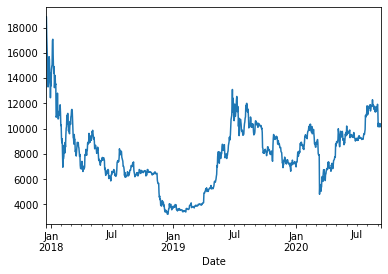

In [25]:
data['CloseUSD'].plot()

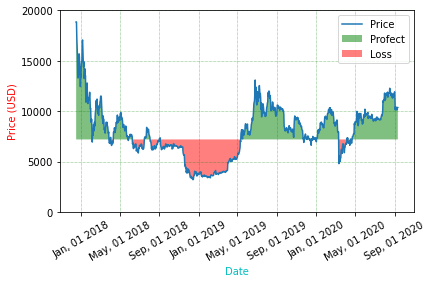

In [26]:
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

fig = plt.figure()
ax=plt.subplot2grid((1,1), (0,0))
ax.fill_between(data.index, data['CloseUSD'], starting_point,
            where=(data['CloseUSD'] > starting_point),
            alpha=0.5, facecolor='g',
            interpolate=True,
            label='Profect'
             )

ax.fill_between(data.index, data['CloseUSD'], starting_point,
            where=(data['CloseUSD'] < starting_point),
            alpha=0.5, facecolor='r',
            interpolate=True,
            label='Loss'
             )


ax.plot_date(data.index, data['CloseUSD'], '-', label='Price')

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gcf().autofmt_xdate()


plt.legend()
plt.xlabel('Date')
plt.ylabel('Price (USD)')
ax.grid(True, color='g', linestyle=':', linewidth=.5)
# solid line '-' or 'solid'
# dashed line '--' or 'dashed'
# dashed-dotted line '-.' or 'dashedot'
# dotted line ':' or 'dotted'


ax.xaxis.label.set_color('c')
ax.yaxis.label.set_color('r')
ax.set_yticks([0, 5000, 10000, 15000, 20000]) # set value for the y axis



plt.tight_layout()
plt.subplots_adjust(bottom=0.20, left=0.121, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()